## Linear Regression

__step1: Load Your Data__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 300

#### Boston Housing Data

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [5]:
print(type(boston))
# it's a dictionary like object 

<class 'sklearn.utils.Bunch'>


In [8]:
info = [
    'these are the features you have in your dataset or input data',
    'prediction column or output data',
    'column names of features',
    'DESCR is short description',
    'filename is source file name of data']


In [14]:
for key, value in zip(boston.keys(), info):
    print(f"{key:>10} : {value}")

      data : these are the features you have in your dataset or input data
    target : prediction column or output data
feature_names : column names of features
     DESCR : DESCR is short description
  filename : filename is source file name of data


In [16]:
boston['data'].shape

(506, 13)

In [17]:
boston['data'][:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [18]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
features = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [21]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
boston['target'][:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [24]:
target = pd.Series(boston['target'], name='price')

In [25]:
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [26]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Regression Analysis for Feature Selections

In [29]:
map_dict  = {
    'CRIM': 'crime rate in town',
    'ZN': 'proportion of Residential zone',
    
}

      CRIM Corr Coeff: -0.39 


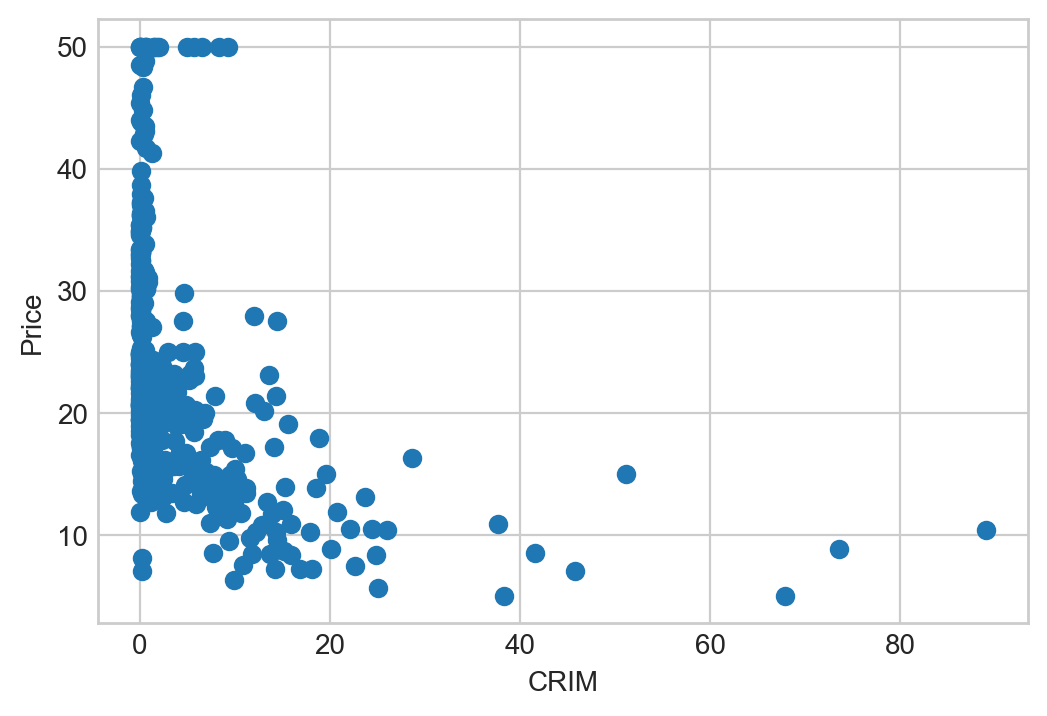

        ZN Corr Coeff:  0.36 


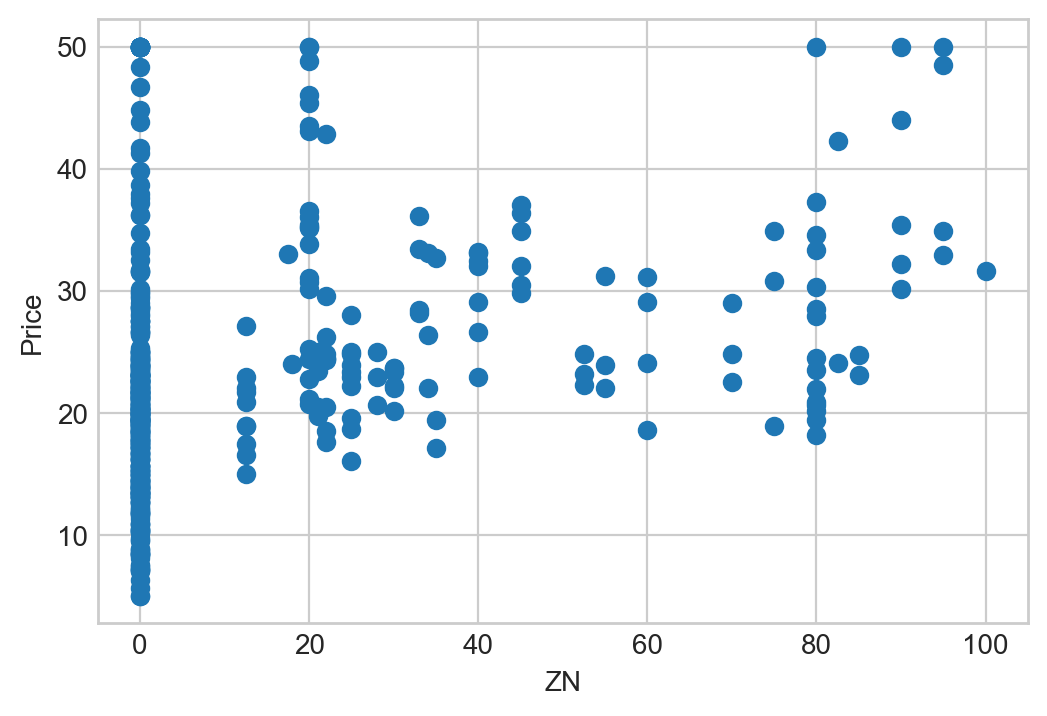

     INDUS Corr Coeff: -0.48 


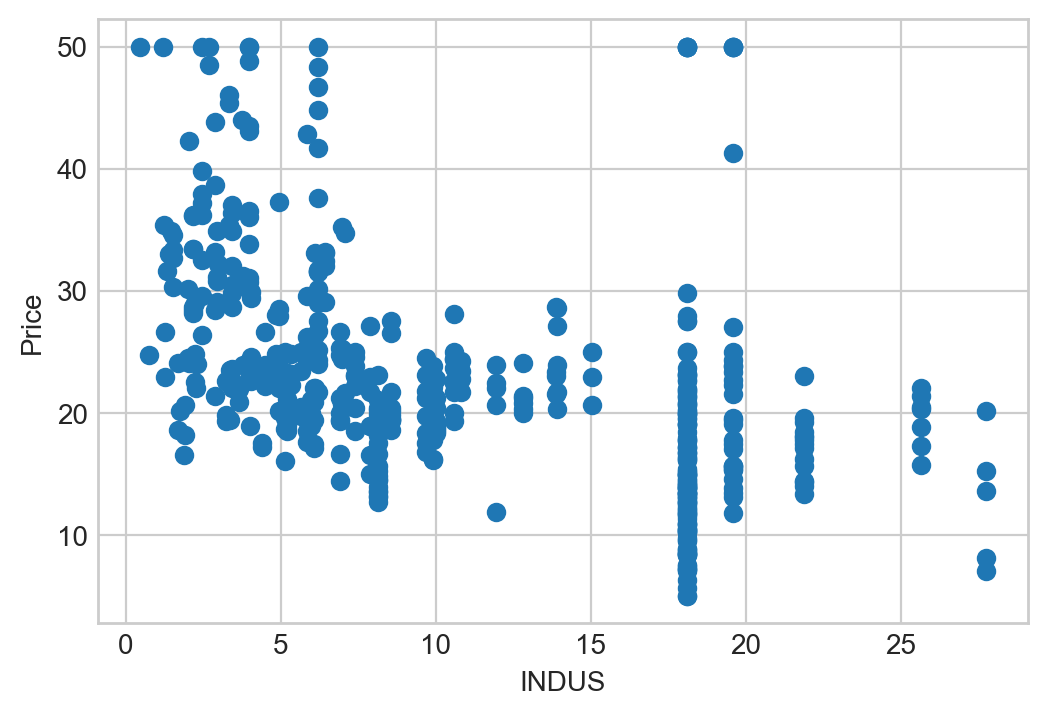

      CHAS Corr Coeff:  0.18 


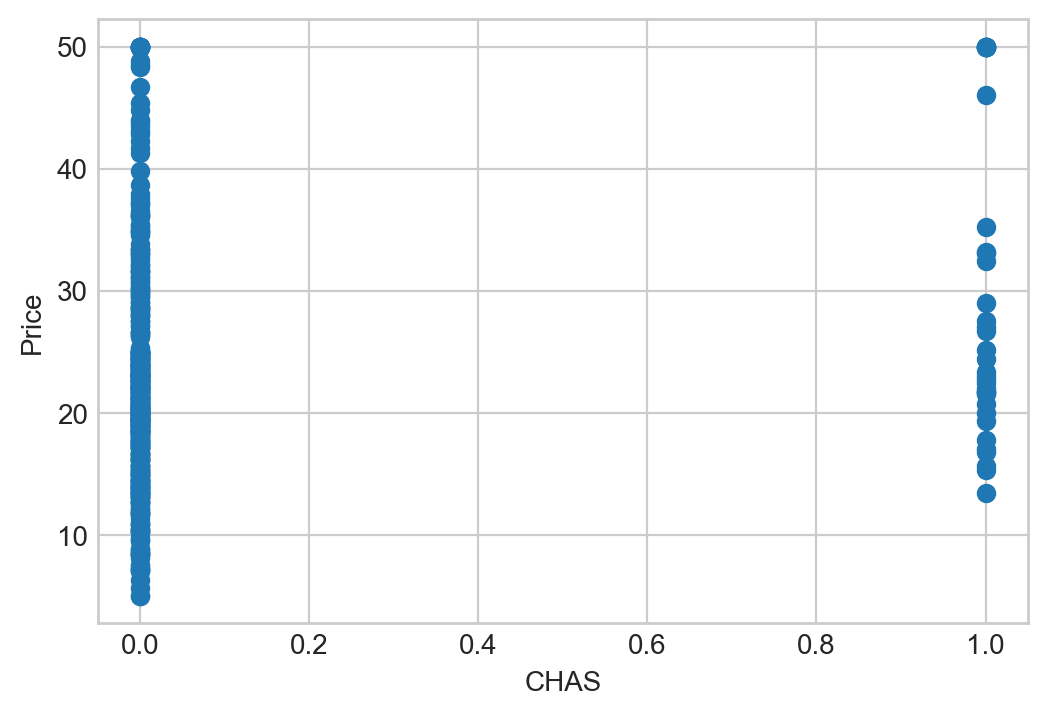

       NOX Corr Coeff: -0.43 


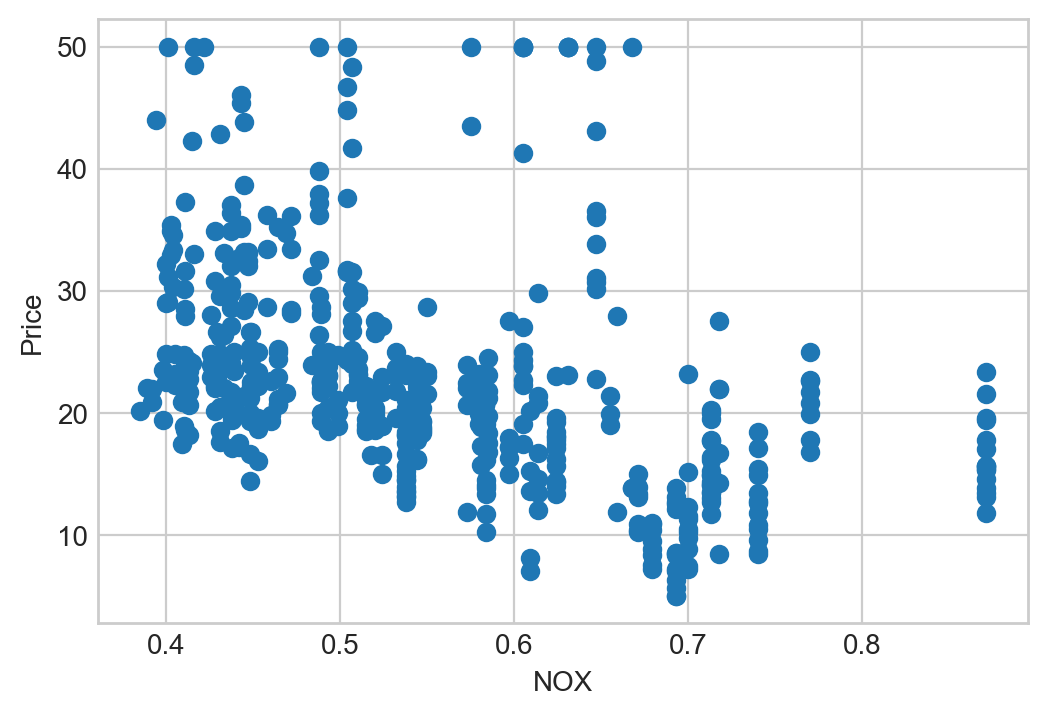

        RM Corr Coeff:  0.70 


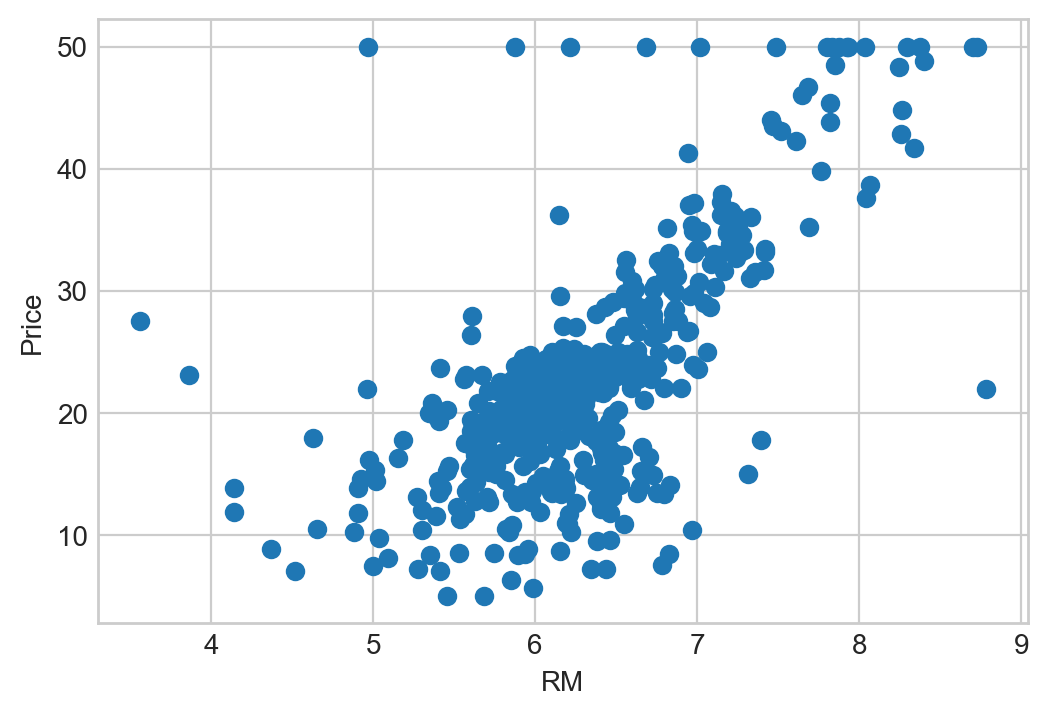

       AGE Corr Coeff: -0.38 


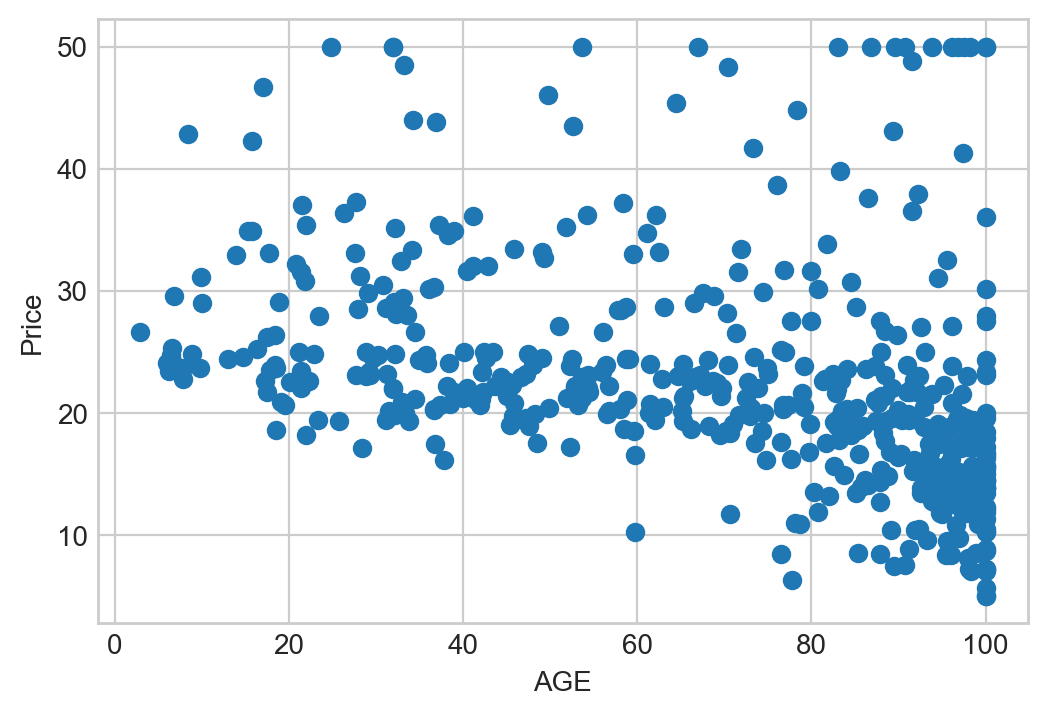

       DIS Corr Coeff:  0.25 


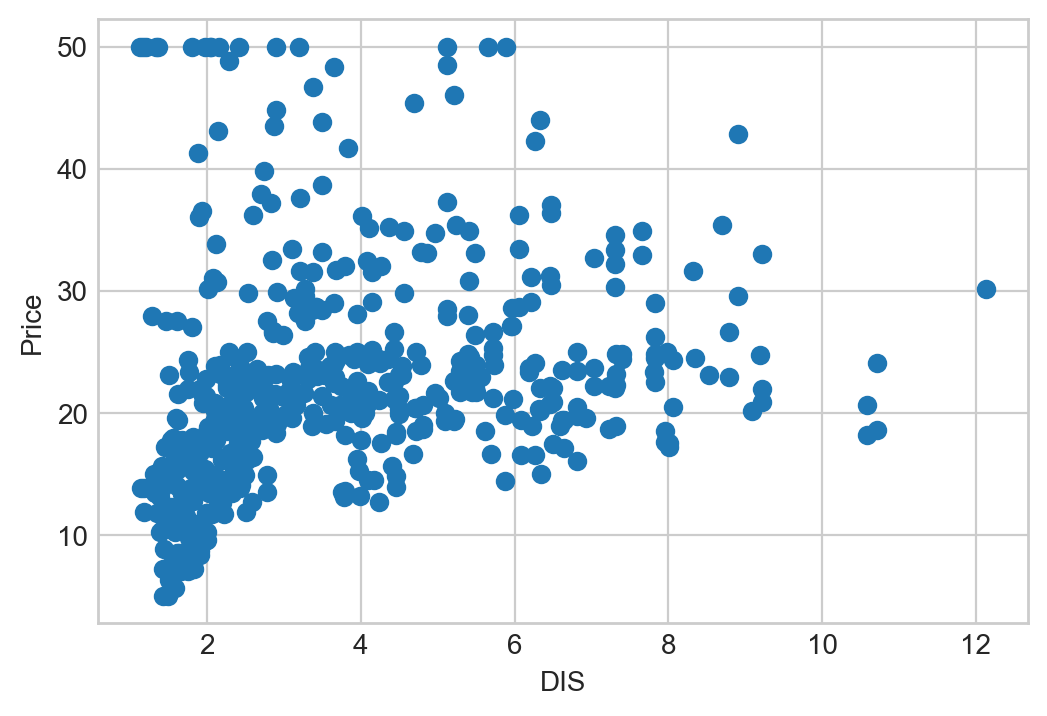

       RAD Corr Coeff: -0.38 


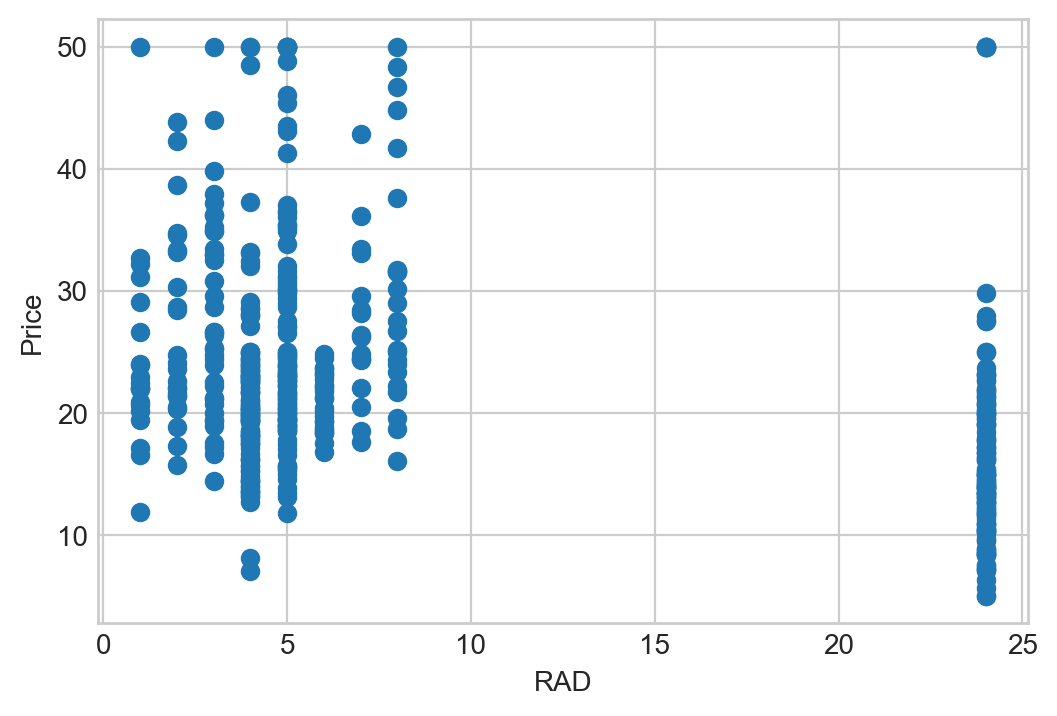

       TAX Corr Coeff: -0.47 


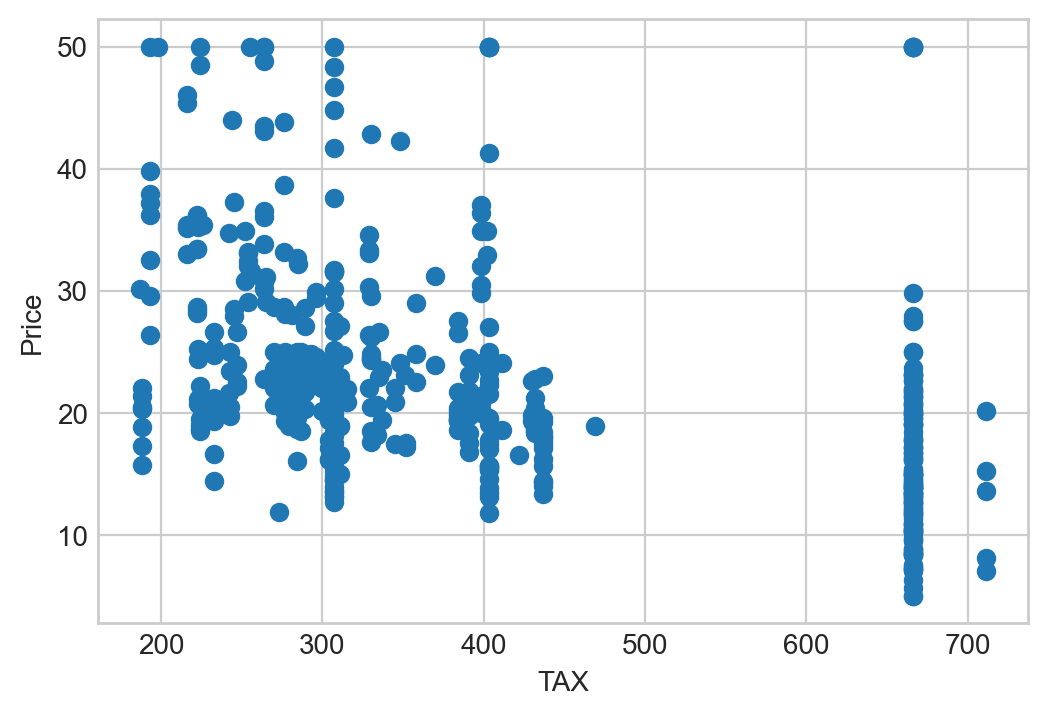

   PTRATIO Corr Coeff: -0.51 


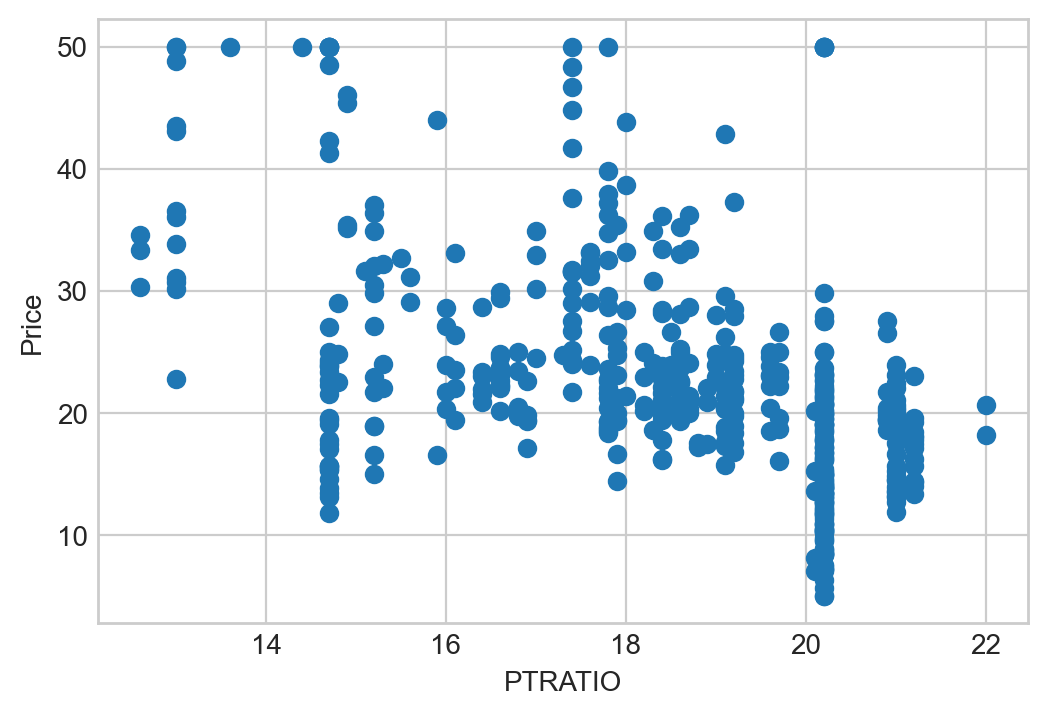

         B Corr Coeff:  0.33 


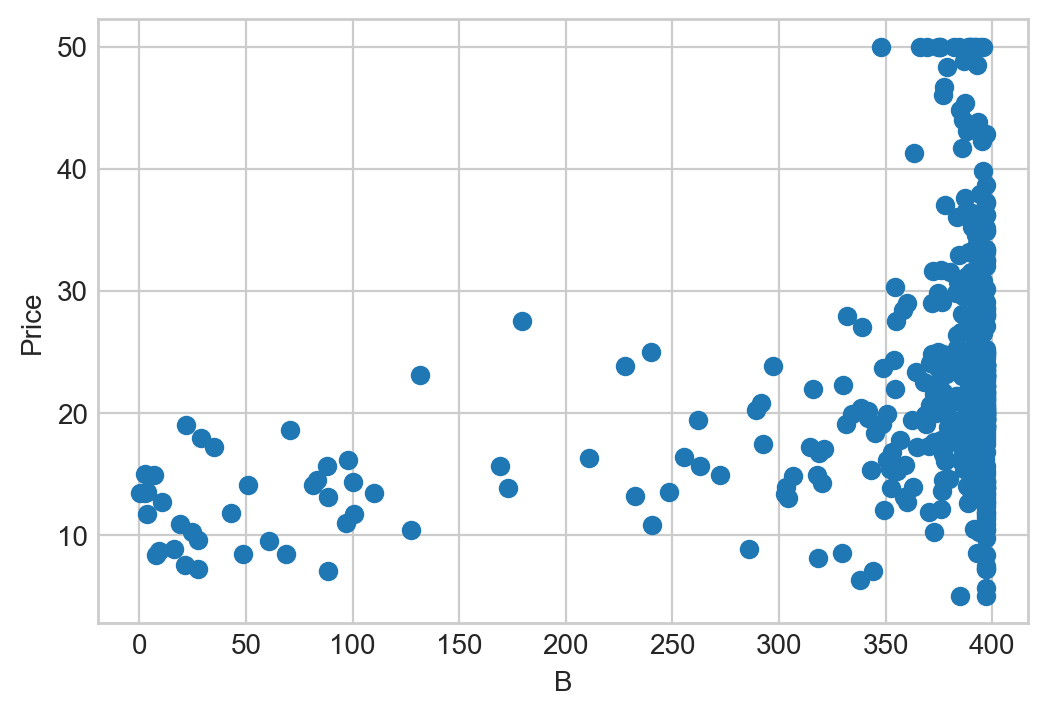

     LSTAT Corr Coeff: -0.74 


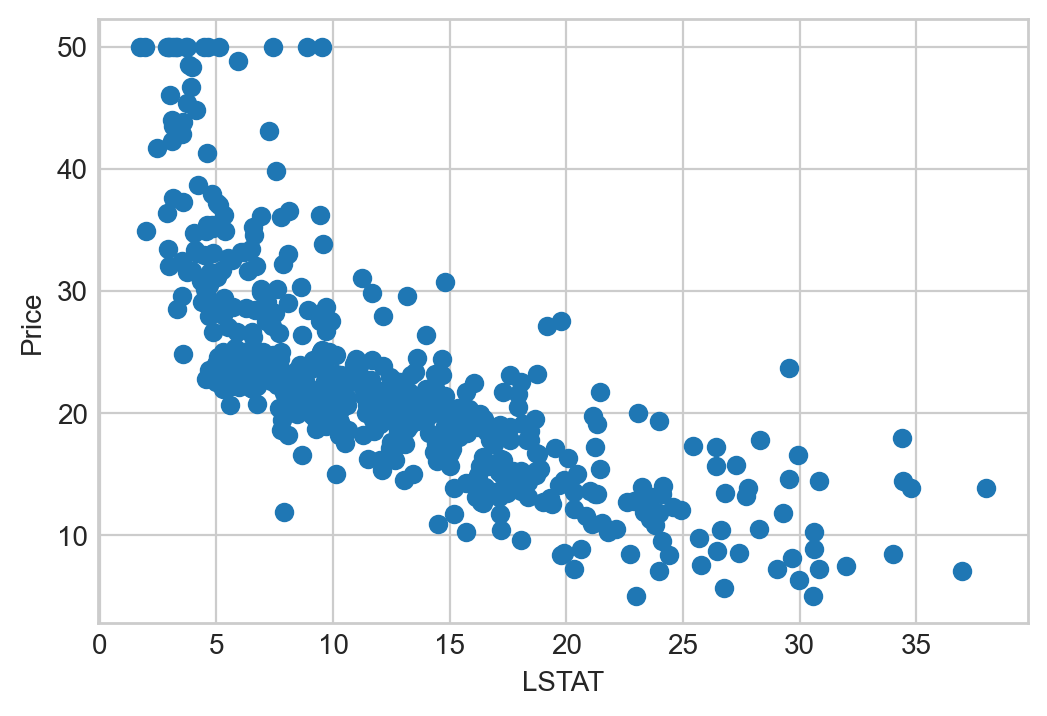

In [40]:
for col in features.columns:
    print(f"{col:>10} Corr Coeff: {np.corrcoef(features[col], target)[0][1]:>5.2f} ")
    plt.figure(dpi=200)
    plt.scatter(features[col], target)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

#### linear , polynomial regression

**feature selection**

In [42]:
features.drop('CHAS', axis=1, inplace=True)

In [43]:
features.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
features.isna().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

__step2 split your data into training and testing datasets__

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                    test_size=0.2, )

In [48]:
features.shape

(506, 12)

In [49]:
X_train.shape

(404, 12)

In [50]:
X_test.shape

(102, 12)

In [51]:
506*.2

101.2

In [52]:
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
125,0.16902,0.0,25.65,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81
227,0.41238,0.0,6.20,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
312,0.26169,0.0,9.90,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72
242,0.10290,30.0,4.93,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22
401,14.23620,0.0,18.10,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32


In [53]:
X_test.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
304,0.05515,33.0,2.18,0.472,7.236,41.1,4.0220,7.0,222.0,18.4,393.68,6.93
196,0.04011,80.0,1.52,0.404,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08
77,0.08707,0.0,12.83,0.437,6.140,45.8,4.0905,5.0,398.0,18.7,386.96,10.27
358,5.20177,0.0,18.10,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48
260,0.54011,20.0,3.97,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59


__step3 model selection__

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

__step4 Learning or fitting of the Model__

In [57]:
model.fit(X_train, y_train)
# X_train -> training features
# y_train -> training target

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
features.shape

(506, 12)

$$\hat y \quad  = \quad \beta_0 \quad + \quad \beta_1 \quad X_1 \quad + \quad \beta_2 \quad X_2 \quad ... \quad +\quad \beta_{12} \quad X_{12}$$

$$ coeff = [ \beta_0, \beta_1, .... \beta_{12} ] $$
$$ intercept = \beta_0 $$

In [59]:
model.coef_

array([-1.12999387e-01,  4.40784136e-02,  6.90802375e-02, -1.89348383e+01,
        3.97726584e+00,  7.60102001e-03, -1.47584385e+00,  3.52256587e-01,
       -1.49903063e-02, -1.10117643e+00,  1.04880949e-02, -5.15489599e-01])

In [60]:
model.intercept_

38.1499870292826

__step5 Model Evaluation__

### metrices

__Mean Squared Error__ to check error in our model

__Mean Absolute Error__ actual error in model

__$R^2 Score$__ Accuracy Coefficient

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

$$ MSE \quad = \quad \frac {  \sum\limits_{i=0}^N\quad{(\hat y - y_i )}^2} {N}$$

In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred[:5]

array([33.40065963, 36.53904992, 23.45105978, 19.67340678, 35.81153772])

In [64]:
y_test.to_numpy()[:5]

array([36.1, 33.3, 20.8, 22.7, 33.8])

In [67]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")

MSE: 18.62
RMSE: 4.31


### Total Sum of Square

$$ TSS \quad = \quad \sum\limits_{i=0}^N\quad (y_i - \bar y_i)^2 $$

#### Risidual Sum of Square Error

$$ RSS \quad = \quad \sum\limits_{i=1}^N\quad (y_i - \hat y_i) ^2 $$

$$ TSS > RSS  \quad \quad so \quad \frac {RSS} {TSS} \in [0,1] $$

$$ R^2 \quad Score \quad = 1 - \frac {RSS} {TSS} $$

error = 0.3 than accuracy = 0.7

error = 0.45 than accuarcy = 0.55

In [69]:
acc = r2_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}")

Accuracy: 73.61


In [71]:
features[:2]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [72]:
target[:2]

0    24.0
1    21.6
Name: price, dtype: float64

In [75]:
model.predict(features[:2])-np.sqrt(mse)

array([25.87323474, 21.17430492])

In [73]:
model.predict(features[:2]) 
# p +- error

array([30.1879379 , 25.48900808])

In [74]:
model.predict(features[:2])+np.sqrt(mse)

array([34.50264106, 29.80371124])

      CRIM Corr Coeff: -0.39 


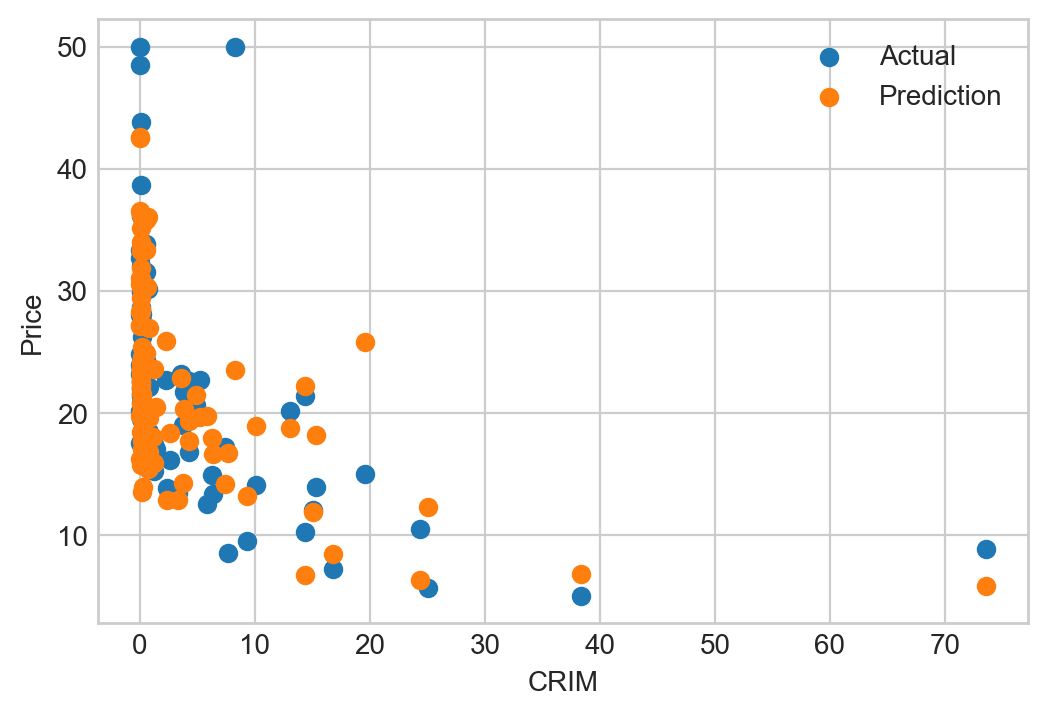

        ZN Corr Coeff:  0.36 


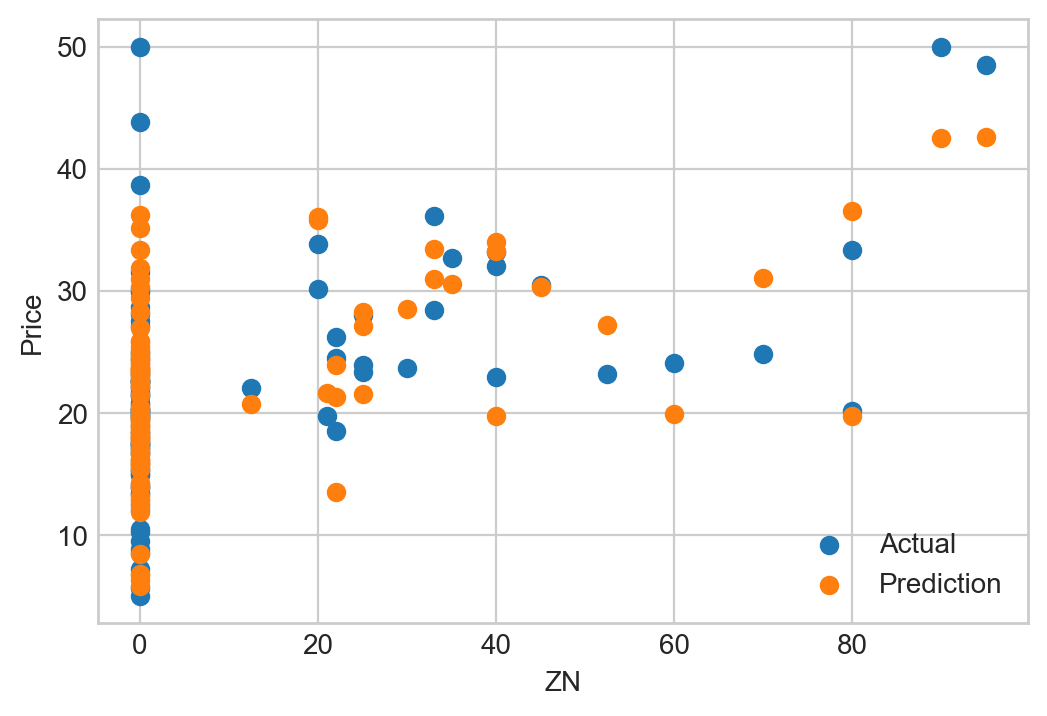

     INDUS Corr Coeff: -0.48 


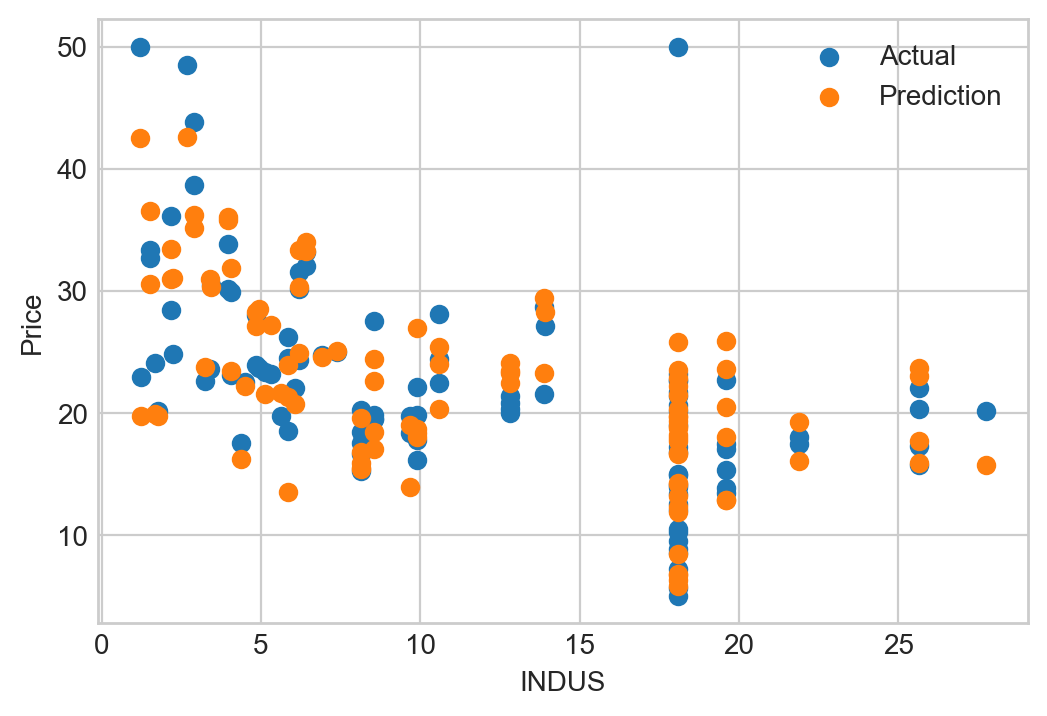

       NOX Corr Coeff: -0.43 


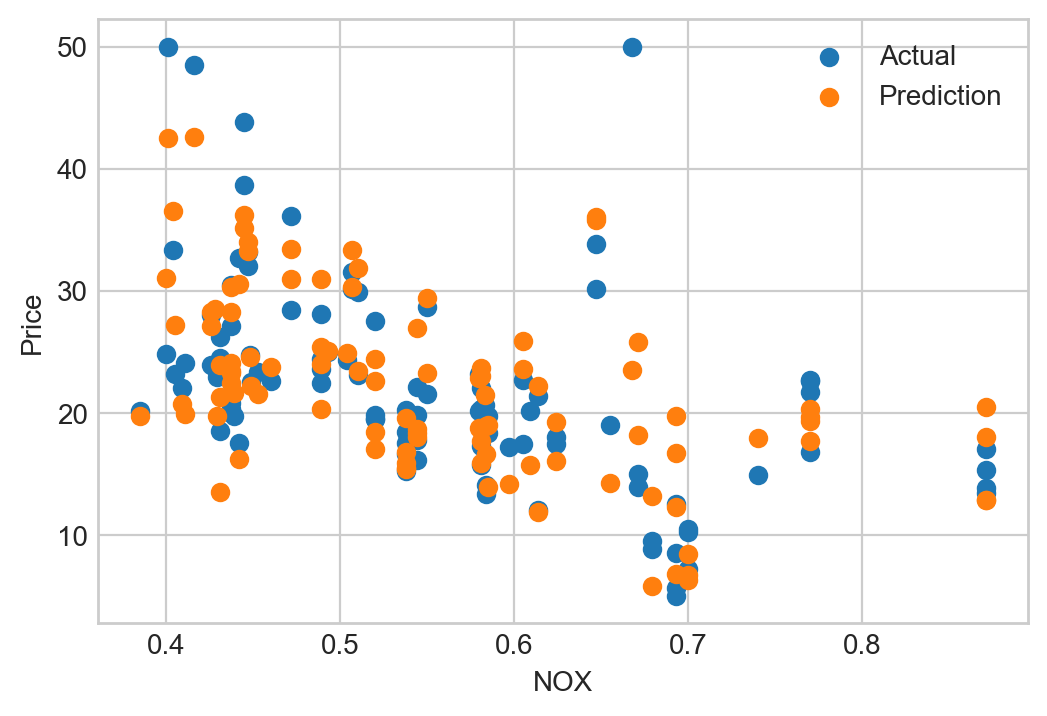

        RM Corr Coeff:  0.70 


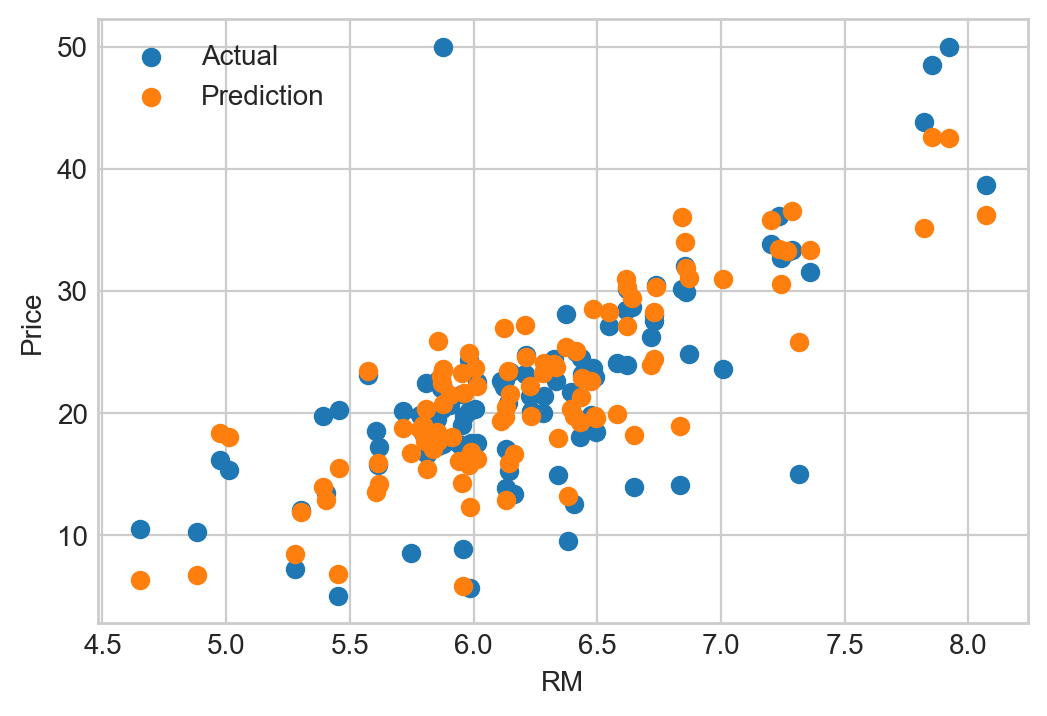

       AGE Corr Coeff: -0.38 


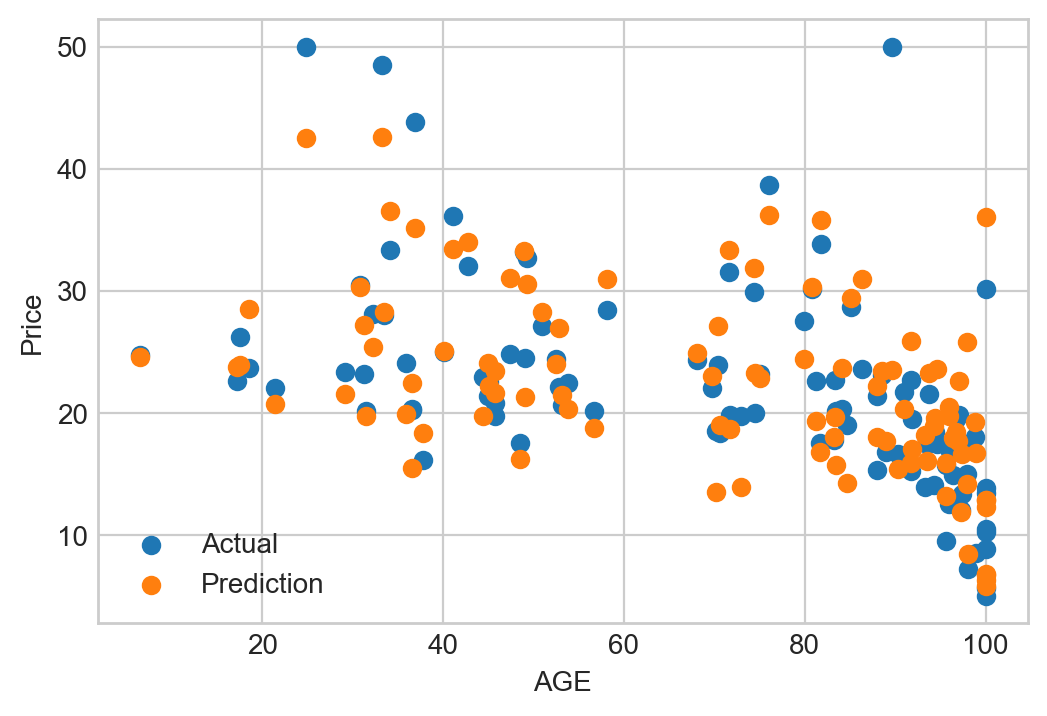

       DIS Corr Coeff:  0.25 


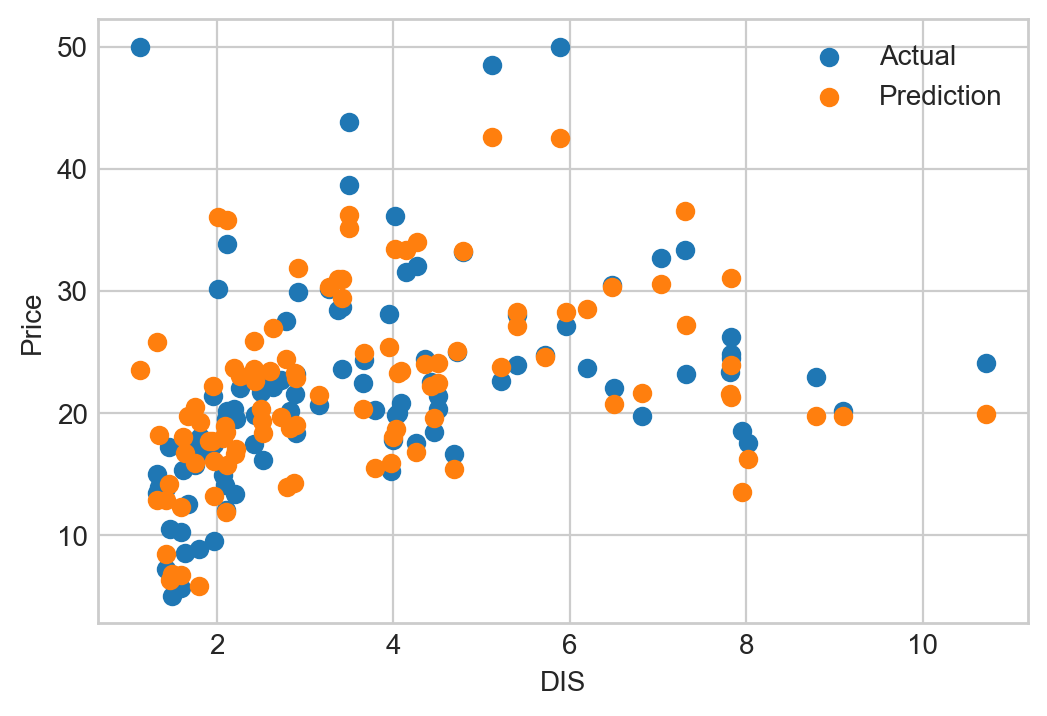

       RAD Corr Coeff: -0.38 


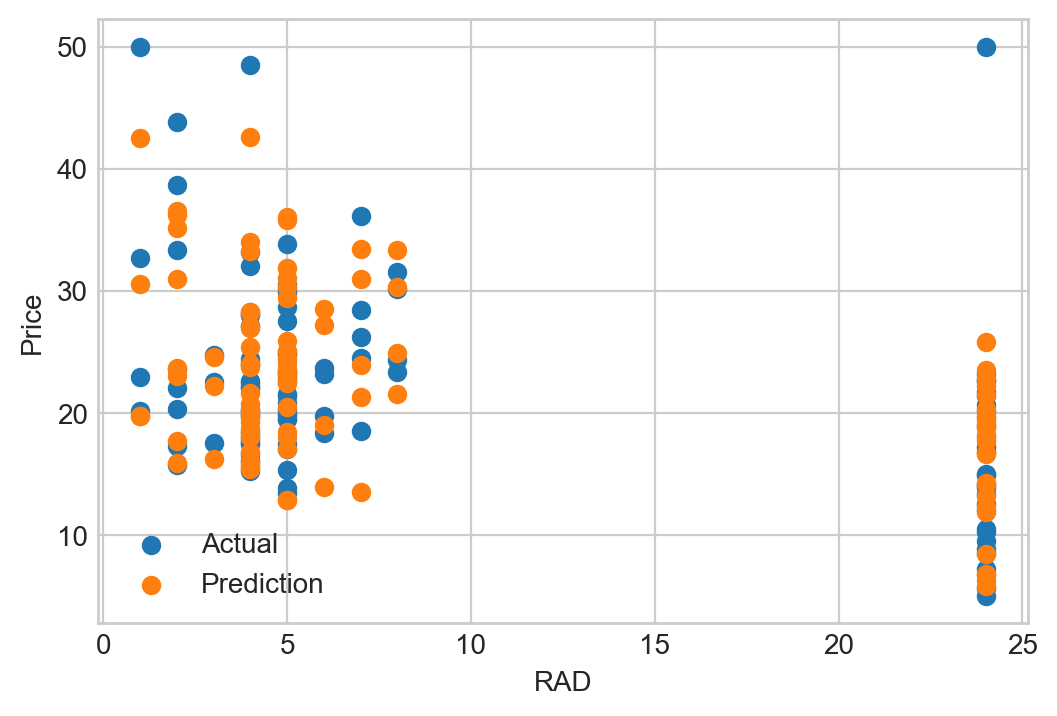

       TAX Corr Coeff: -0.47 


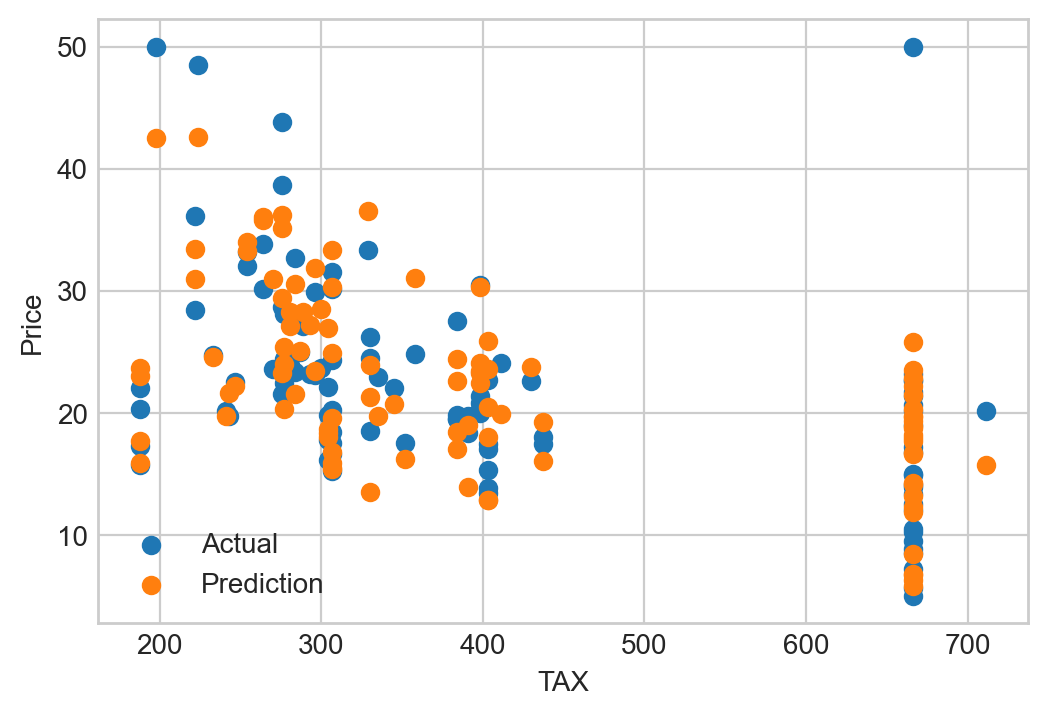

   PTRATIO Corr Coeff: -0.51 


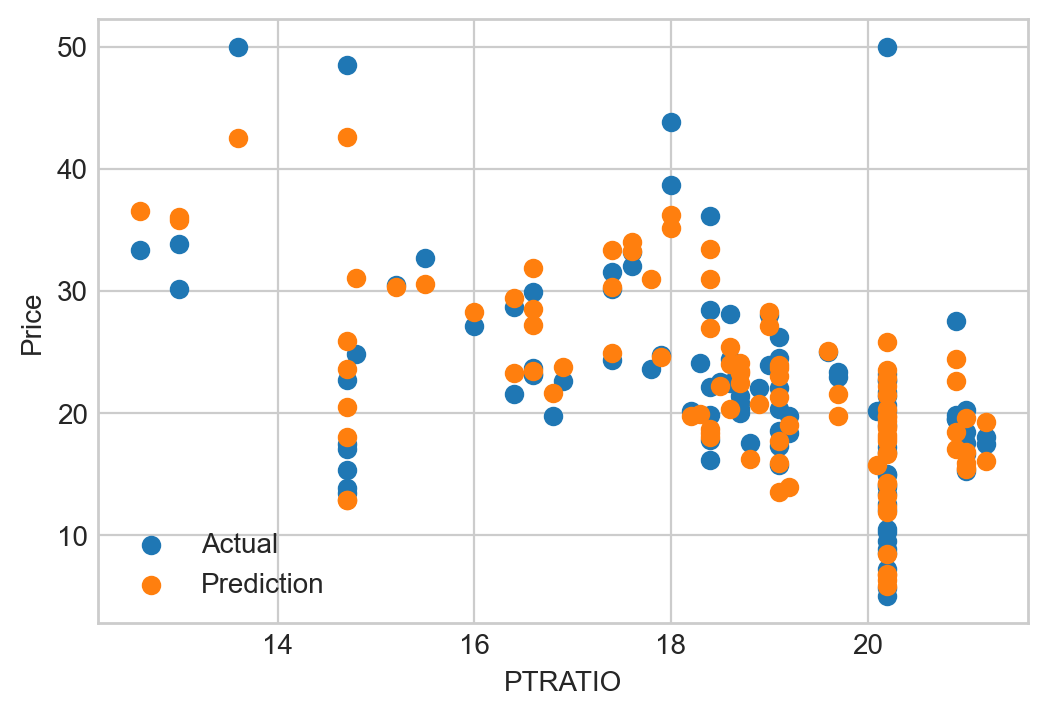

         B Corr Coeff:  0.33 


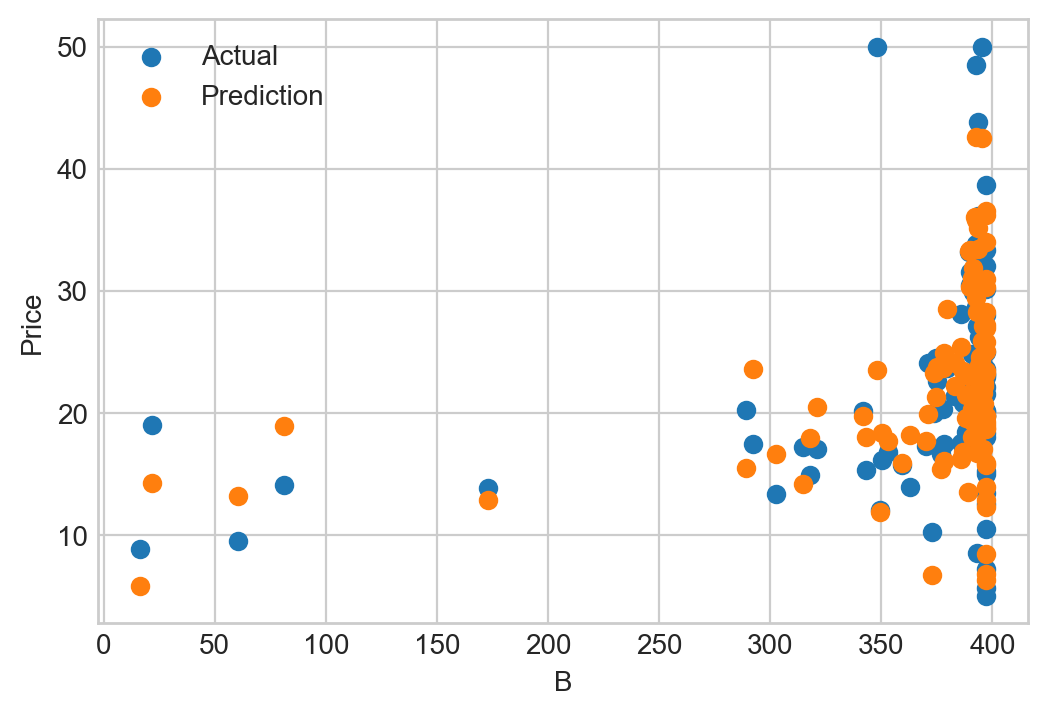

     LSTAT Corr Coeff: -0.74 


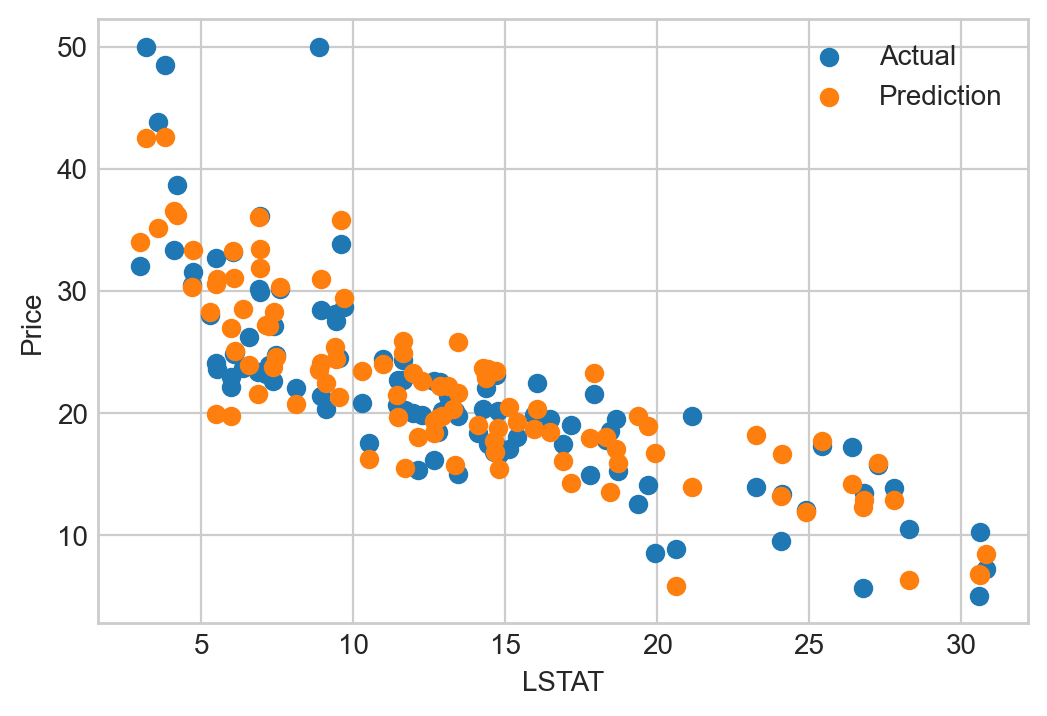

In [76]:
for col in features.columns:
    print(f"{col:>10} Corr Coeff: {np.corrcoef(features[col], target)[0][1]:>5.2f} ")
    plt.figure(dpi=200)
    plt.scatter(X_test[col], y_test, label='Actual')
    plt.scatter(X_test[col], y_pred, label='Prediction')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

### Logistic Regression

In [77]:
from tqdm import tqdm
from time import sleep

for _ in tqdm(range(600)):
    sleep(1)

100%|███████████████████████████████████████████████████████████████████████| 600/600 [10:00<00:00,  1.00s/it]


In [80]:
new_data = features[['RM', 'LSTAT', 'AGE']]

In [81]:
new_target = target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(new_data, new_target)

In [83]:
X_train.head()

,RM,LSTAT,AGE
456,5.976,19.01,87.9
167,5.877,12.14,79.2
234,6.726,8.05,66.5
218,5.951,17.92,93.8
103,6.137,13.44,87.4


In [123]:
y_train.head()

456    12.7
167    23.8
234    29.0
218    21.5
103    19.3
Name: price, dtype: float64

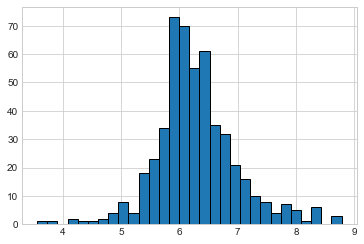

In [94]:
plt.hist(new_data['RM'], bins=30, ec='k')
plt.show()

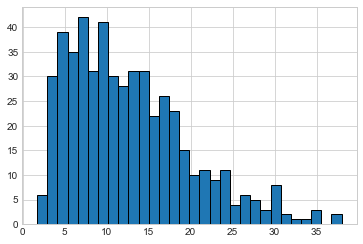

In [95]:
plt.hist(new_data['LSTAT'], bins=30, ec='k')
plt.show()

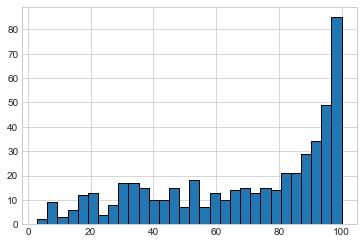

In [96]:
plt.hist(new_data['AGE'], bins=30, ec='k')
plt.show()

#### Normalization

In [97]:
from sklearn.preprocessing import StandardScaler

    standard normal 0 mean +- 1 deviation

In [98]:
scale_model = StandardScaler()

In [99]:
scaled_features = scale_model.fit_transform(new_data)

In [102]:
scaled_features = pd.DataFrame(scaled_features, columns=new_data.columns)

In [103]:
scaled_features[:5]

,RM,LSTAT,AGE
0,0.413672,-1.075562,-0.120013
1,0.194274,-0.492439,0.367166
2,1.282714,-1.208727,-0.265812
3,1.016303,-1.361517,-0.809889
4,1.228577,-1.026501,-0.511180


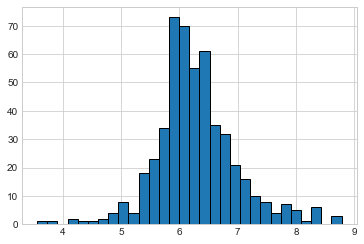

In [104]:
plt.hist(new_data['RM'], bins=30, ec='k')
plt.show()

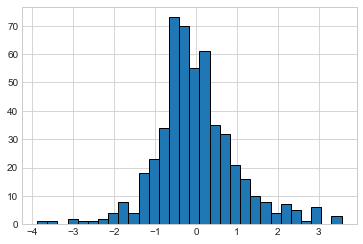

In [105]:
plt.hist(scaled_features['RM'], bins=30, ec='k')
plt.show()

In [84]:
y_train.head()

456    12.7
167    23.8
234    29.0
218    21.5
103    19.3
Name: price, dtype: float64

In [85]:
model = LinearRegression()

In [86]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

    Gradient Descent Algorithm

In [87]:
model.coef_

array([ 6.01289148e+00, -5.47900114e-01, -5.19210433e-03])

In [88]:
model.intercept_

-7.978016634401708

In [89]:
pred = model.predict(X_test)

In [91]:
pred[:5]

array([16.90499687, 18.78407683, 20.09403117, 18.76872243, 20.5822146 ])

In [92]:
y_test[:5]

378    13.1
376    13.9
459    20.0
497    18.3
458    14.9
Name: price, dtype: float64

In [93]:
r2_score(y_test, pred)

0.5415336829407112

In [106]:
new_model = LinearRegression()

In [107]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_features, target)

In [111]:
new_model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
pred = new_model.predict(xtest)

In [113]:
r2_score(ytest, pred)

0.5283998207725458

In [115]:
y_pred = model.predict(X_test)

__final step__ Deploy Your Model

    IBM, AWS --> ml models as service

**cloud computing**

local deployment 

    websites, android

    operation -> server, cloud-servers

In [116]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
type(model)

sklearn.linear_model.base.LinearRegression

In [117]:
import pickle

In [118]:
fp = open('boston.pkl', 'wb')

### Saving our model

In [120]:
pickle.dump(model, fp)

In [121]:
fp.close()

In [122]:
pwd

'C:\\Users\\sachin\\Desktop\\InternBatch\\machine_learning'

     Create an application to predict mileage of an car based on horsepower, weight and displacement using Linear Regression Model

In [125]:
mpg = sns.load_dataset('mpg')

In [126]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [127]:
target = mpg['mpg']

In [128]:
features = mpg[['horsepower', 'weight', 'displacement']]

In [129]:
features.head()

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [130]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64